https://www.kaggle.com/code/meenaaa/cancer-death-rate-xgboost/notebook

https://www.researchgate.net/publication/341042405_On_linear_regression_models_with_hierarchical_categorical_variables

In [1]:
# data wrangling tools
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# statistical analysis
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# scikit-learn
from sklearn.model_selection import train_test_split

import time

In [2]:
import numpy as np
import pandas as pd
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
import matplotlib.pyplot as plt
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.layers import *
# from tensorflow.keras import *
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.callbacks import LearningRateScheduler
# from tensorflow.keras.optimizers.schedules import ExponentialDecay
# from pickle import load

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
trainset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Raw/trainset.csv", index_col = 0)
trainset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,City,State,Region,Division,TARGET_deathRate
Geography,,,,,,,,,,,,,,,,,,,,,
"Greene County, North Carolina",105.0,43.000,440.800000,37263,21134.000,28.3,0.000000,0,39.00,37.0,...,24.785427,0.150038,5.051674,43.921351,8.353222,603,33,2,6,183.2
"McHenry County, Illinois",1192.5,329.875,474.400000,72741,153227.875,6.9,0.000000,8,39.30,38.2,...,1.345992,2.633745,2.641228,61.798687,4.286142,948,13,0,0,181.4
"Wichita County, Kansas",1192.5,6.000,453.549422,53447,2157.000,11.5,0.000000,6,35.70,34.5,...,0.000000,0.317604,2.903811,57.490397,7.061503,1614,16,0,7,177.6
"Mineral County, Montana",35.0,12.000,538.800000,36449,4251.000,17.3,0.000000,0,53.55,51.9,...,0.070788,0.165172,0.141576,46.769034,3.333333,984,26,3,3,188.8
"Ohio County, West Virginia",308.0,123.000,500.900000,40195,43066.000,18.4,209.768024,1,43.30,41.3,...,4.152439,0.850196,0.288746,42.926988,3.257227,1085,48,2,6,184.4


In [5]:
valset = pd.read_csv("G:/My Drive/DataMining/POC/LungCancer/Dataset/Raw/valset.csv", index_col = 0)
valset.head(5)

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,...,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate,City,State,Region,Division
Geography,,,,,,,,,,,,,,,,,,,,,
"Linn County, Oregon",675.0,273,477.4,44358,120547.0,19.1,8.295520,3,39.50,38.8,...,0.437922,1.223828,1.237276,51.807095,4.659173,186.5,139,32,3,5
"Champaign County, Illinois",781.0,267,450.2,47966,169831.5,22.6,201.766857,4,29.30,28.2,...,12.588086,2.628022,0.978296,39.728702,3.467191,152.5,40,8,0,0
"Saratoga County, New York",1113.5,354,508.7,71885,169831.5,7.2,26.519454,8,41.80,40.9,...,1.611447,2.372930,0.393254,52.770765,4.520914,174.2,228,27,1,2
"Montmorency County, Michigan",88.0,37,484.4,37961,9259.0,15.7,0.000000,1,52.35,50.7,...,0.361664,0.000000,0.340389,49.213759,3.263086,207.6,172,17,0,0
"Barrow County, Georgia",281.0,114,457.7,49698,75370.0,13.0,0.000000,5,34.80,32.9,...,11.578626,2.628022,1.976060,55.195246,5.318187,192.0,8,6,2,6


In [6]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2467 entries, Greene County, North Carolina to Van Wert County, Ohio
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2467 non-null   float64
 1   avgDeathsPerYear         2467 non-null   float64
 2   incidenceRate            2467 non-null   float64
 3   medIncome                2467 non-null   int64  
 4   popEst2015               2467 non-null   float64
 5   povertyPercent           2467 non-null   float64
 6   studyPerCap              2467 non-null   float64
 7   binnedInc                2467 non-null   int64  
 8   MedianAge                2467 non-null   float64
 9   MedianAgeMale            2467 non-null   float64
 10  MedianAgeFemale          2467 non-null   float64
 11  AvgHouseholdSize         2467 non-null   float64
 12  PercentMarried           2467 non-null   float64
 13  PctNoHS18_24             2467 non-null

In [7]:
valset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, Linn County, Oregon to Macon County, Missouri
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              305 non-null    float64
 1   avgDeathsPerYear         305 non-null    int64  
 2   incidenceRate            305 non-null    float64
 3   medIncome                305 non-null    int64  
 4   popEst2015               305 non-null    float64
 5   povertyPercent           305 non-null    float64
 6   studyPerCap              305 non-null    float64
 7   binnedInc                305 non-null    int64  
 8   MedianAge                305 non-null    float64
 9   MedianAgeMale            305 non-null    float64
 10  MedianAgeFemale          305 non-null    float64
 11  AvgHouseholdSize         305 non-null    float64
 12  PercentMarried           305 non-null    float64
 13  PctNoHS18_24             305 non-null    float64

In [8]:
X_train = trainset.drop(['TARGET_deathRate'], axis = 1)
y_train = trainset['TARGET_deathRate']

In [9]:
X_val = valset.drop(['TARGET_deathRate'], axis = 1)
y_val = valset['TARGET_deathRate']

In [10]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(2467, 36) (2467,)
(305, 36) (305,)


# Measure

In [11]:
#evaluation metrics for regression model
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score

In [12]:
def deviation_function(y_val, pred):
  deviation = []
  for i in range(0, len(y_val)):
    deviation.append(abs(pred[i] - y_val[i]) / y_val[i])
  return np.array(deviation).mean()

# Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
#linear regression model
import optuna
from sklearn.linear_model import LinearRegression 
import sklearn.model_selection
#Grid search model
# from sklearn.model_selection import GridSearchCV         

In [14]:
def LR_Model(trial):
  fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
  copy_X = trial.suggest_categorical('copy_X', [True, False])
  lr = LinearRegression(copy_X = copy_X, fit_intercept = fit_intercept)
  score = sklearn.model_selection.cross_val_score(lr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [15]:
lr_study = optuna.create_study(direction="maximize")
lr_study.optimize(LR_Model, n_trials=4)
print(lr_study.best_trial)

[I 2023-05-10 13:50:11,774] A new study created in memory with name: no-name-4c5503a6-4ee0-429c-944c-147e5dfe573c
[I 2023-05-10 13:50:11,801] Trial 0 finished with value: 0.532145492172445 and parameters: {'fit_intercept': True, 'copy_X': True}. Best is trial 0 with value: 0.532145492172445.
[I 2023-05-10 13:50:11,834] Trial 1 finished with value: 0.5206515147670823 and parameters: {'fit_intercept': False, 'copy_X': True}. Best is trial 0 with value: 0.532145492172445.
[I 2023-05-10 13:50:11,873] Trial 2 finished with value: 0.532145492172445 and parameters: {'fit_intercept': True, 'copy_X': True}. Best is trial 0 with value: 0.532145492172445.
[I 2023-05-10 13:50:11,898] Trial 3 finished with value: 0.532145492172445 and parameters: {'fit_intercept': True, 'copy_X': False}. Best is trial 0 with value: 0.532145492172445.


FrozenTrial(number=0, state=TrialState.COMPLETE, values=[0.532145492172445], datetime_start=datetime.datetime(2023, 5, 10, 13, 50, 11, 775608), datetime_complete=datetime.datetime(2023, 5, 10, 13, 50, 11, 801115), params={'fit_intercept': True, 'copy_X': True}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'fit_intercept': CategoricalDistribution(choices=(True, False)), 'copy_X': CategoricalDistribution(choices=(True, False))}, trial_id=0, value=None)


In [16]:
plot_optimization_history(lr_study)

In [17]:
lr_study.best_trial.params

{'fit_intercept': True, 'copy_X': True}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [18]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Raw/lr_parameter.npy", lr_study.best_trial.params)

In [19]:
lr = LinearRegression(**lr_study.best_trial.params)


In [20]:
#training the model
lr_model = lr.fit(X_train,y_train) 
lr_pred = lr_model.predict(X_val)

## Evaluate

In [21]:
#evaluating the model with the following metrics
#mean squared error
lr_mse=mean_squared_error(lr_pred, y_val)     
#mean absolute error     
lr_mae=mean_absolute_error(lr_pred, y_val)  
#root mean squared error      
lr_rmse=np.sqrt(mean_squared_error(lr_pred, y_val))
#r2 score
lr_r2 = r2_score(lr_pred, y_val)
print(f'mse: {lr_mse}')
print(f'mae: {lr_mae}')
print(f'rmse: {lr_rmse}')
print(f"R-Squared: {lr_r2}")

mse: 321.95840865572393
mae: 13.794004082707051
rmse: 17.943199510001662
R-Squared: 0.3680029193818981


In [22]:
lr_df =pd.DataFrame({"mse": lr_mse,"mae": lr_mae,"rmse": lr_rmse, "r2": lr_r2, "deviation": deviation_function(y_val, lr_pred)},index=['Linear Regression'])

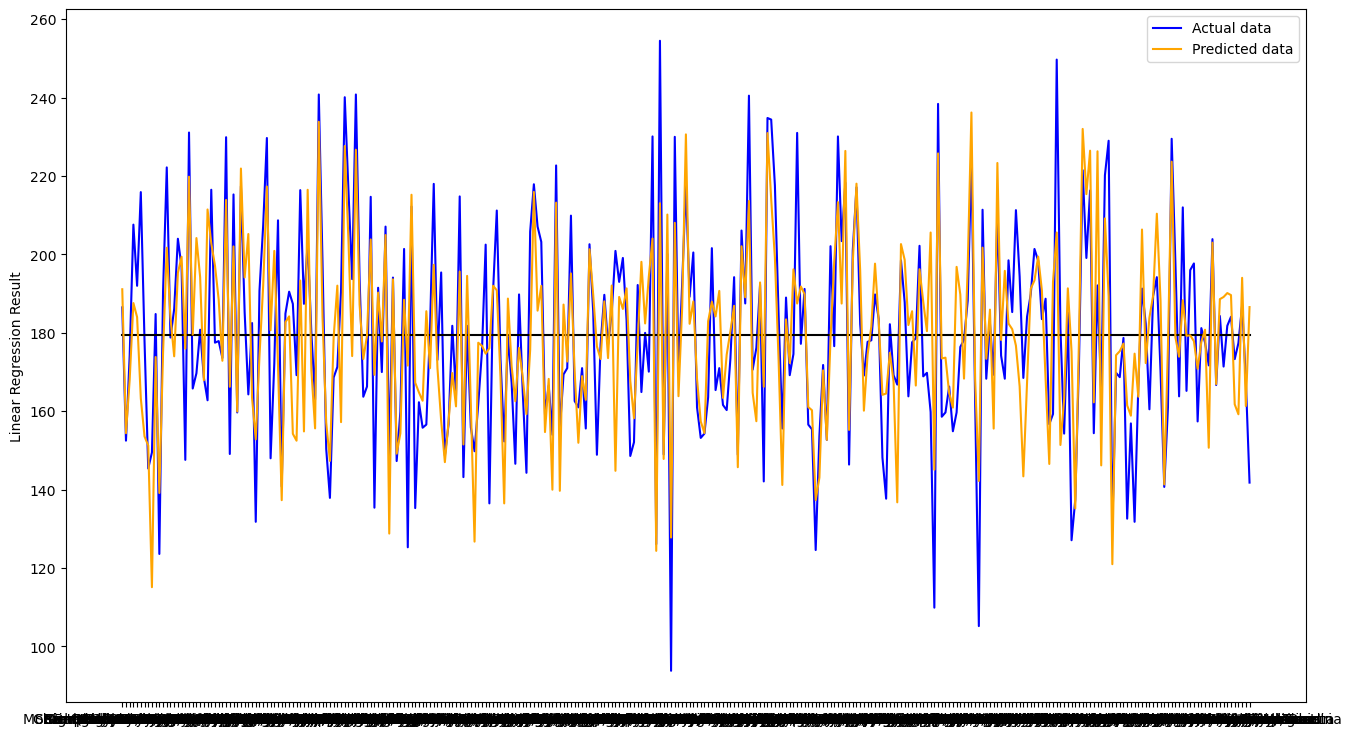

In [23]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Linear Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(lr_pred, 'orange', label='Predicted data')
plt.legend()

# Decision Tree Regression

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [24]:
# decision tree regression model
from sklearn.tree import DecisionTreeRegressor             

In [25]:
def DTR_Model(trial):
  criterion = trial.suggest_categorical('criterion', ["squared_error", "friedman_mse", "absolute_error", "poisson"])
  splitter = trial.suggest_categorical('splitter', ["best", "random"])
  max_features = trial.suggest_categorical('max_features', ["auto", "sqrt", "log2", None])
  dtr = DecisionTreeRegressor(criterion=criterion, max_features = max_features, splitter = splitter)
  
  score = sklearn.model_selection.cross_val_score(dtr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [26]:
dtr_study = optuna.create_study(direction="maximize")
dtr_study.optimize(DTR_Model, n_trials=32)
print(dtr_study.best_trial)

[I 2023-05-10 13:50:14,803] A new study created in memory with name: no-name-1ced5f6b-1629-422d-89b2-c28fa9425802
[I 2023-05-10 13:50:15,976] Trial 0 finished with value: 0.03468464366710663 and parameters: {'criterion': 'absolute_error', 'splitter': 'best', 'max_features': 'auto'}. Best is trial 0 with value: 0.03468464366710663.
[I 2023-05-10 13:50:16,080] Trial 1 finished with value: 0.00172985615809144 and parameters: {'criterion': 'friedman_mse', 'splitter': 'best', 'max_features': 'auto'}. Best is trial 0 with value: 0.03468464366710663.
[I 2023-05-10 13:50:16,106] Trial 2 finished with value: -0.0525919341150208 and parameters: {'criterion': 'friedman_mse', 'splitter': 'best', 'max_features': 'log2'}. Best is trial 0 with value: 0.03468464366710663.
[I 2023-05-10 13:50:16,630] Trial 3 finished with value: 0.008372135634559222 and parameters: {'criterion': 'absolute_error', 'splitter': 'random', 'max_features': None}. Best is trial 0 with value: 0.03468464366710663.
[I 2023-05-10

FrozenTrial(number=30, state=TrialState.COMPLETE, values=[0.06391709457380816], datetime_start=datetime.datetime(2023, 5, 10, 13, 50, 22, 910960), datetime_complete=datetime.datetime(2023, 5, 10, 13, 50, 23, 24497), params={'criterion': 'squared_error', 'splitter': 'best', 'max_features': 'auto'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'criterion': CategoricalDistribution(choices=('squared_error', 'friedman_mse', 'absolute_error', 'poisson')), 'splitter': CategoricalDistribution(choices=('best', 'random')), 'max_features': CategoricalDistribution(choices=('auto', 'sqrt', 'log2', None))}, trial_id=30, value=None)


In [27]:
plot_optimization_history(dtr_study)

In [28]:
dtr_study.best_trial.params

{'criterion': 'squared_error', 'splitter': 'best', 'max_features': 'auto'}

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [29]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Raw/dtr_parameter.npy", dtr_study.best_trial.params)

In [30]:
dtr = DecisionTreeRegressor(**dtr_study.best_trial.params)

In [31]:
#training the model
dtr_model = dtr.fit(X_train,y_train) 
dtr_pred = dtr_model.predict(X_val)

## Evaluate

In [32]:
#evaluating the model with the following metrics
#mean squared error
dtr_mse=mean_squared_error(dtr_pred, y_val)     
#mean absolute error     
dtr_mae=mean_absolute_error(dtr_pred, y_val)  
#root mean squared error      
dtr_rmse=np.sqrt(mean_squared_error(dtr_pred, y_val))
#r2 score
dtr_r2 = r2_score(dtr_pred, y_val)
print(f'mse: {dtr_mse}')
print(f'mae: {dtr_mae}')
print(f'rmse: {dtr_rmse}')
print(f"r2_score: {dtr_r2}")

mse: 747.9861311475408
mae: 20.88295081967213
rmse: 27.34933511344546
r2_score: 0.03732182675701501


In [33]:
dtr_df =pd.DataFrame({"mse": dtr_mse,"mae": dtr_mae,"rmse": dtr_rmse, "r2": dtr_r2, "deviation": deviation_function(y_val, dtr_pred)},index=['Decision Tree Regression'])

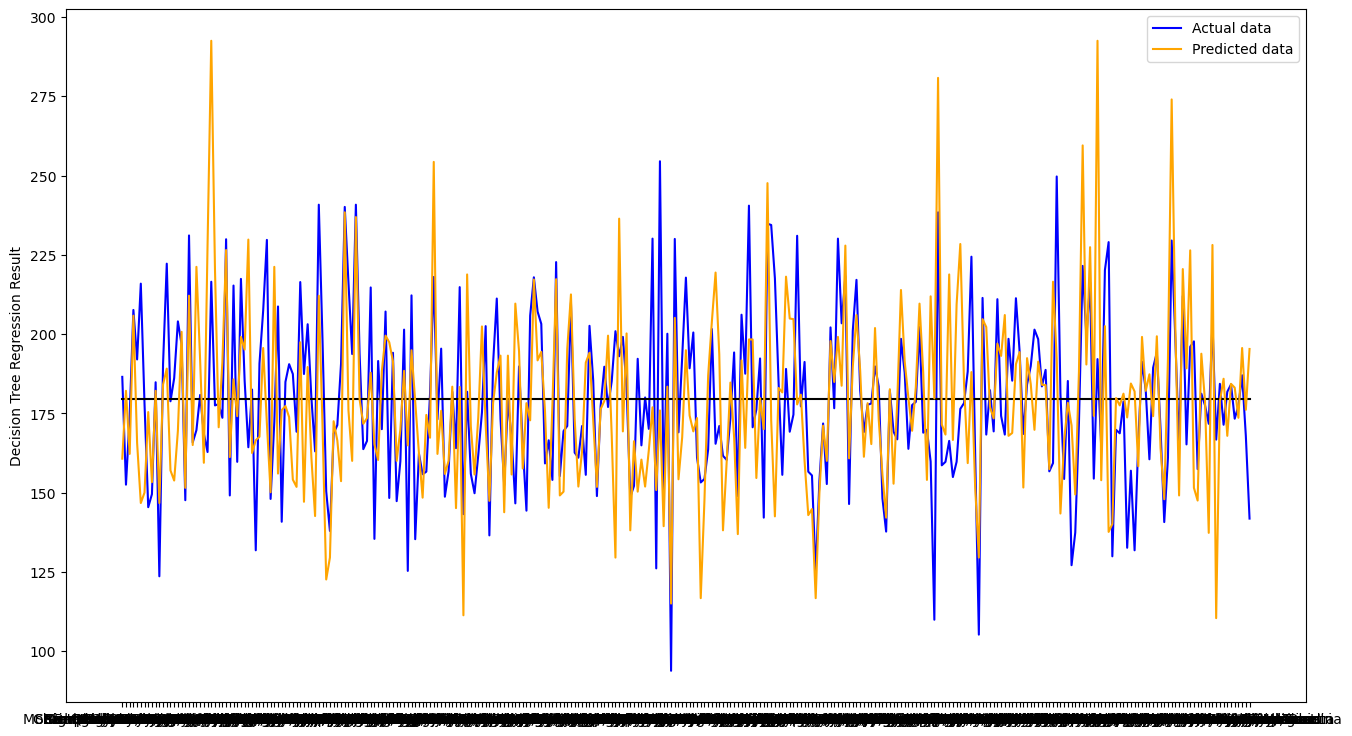

In [34]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Decision Tree Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(dtr_pred, 'orange', label='Predicted data')
plt.legend()

# Random Forest Regression

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [35]:
# random forest regression model
from sklearn.ensemble import RandomForestRegressor             

In [36]:
def RFR_Model(trial):
  criterion = trial.suggest_categorical('criterion', ["squared_error", "friedman_mse", "absolute_error", "poisson"])
  max_features = trial.suggest_categorical('max_features', [1, "sqrt", "log2", None])
  rfr = RandomForestRegressor(criterion=criterion, max_features = max_features)
  
  score = sklearn.model_selection.cross_val_score(rfr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [37]:
rfr_study = optuna.create_study(direction="maximize")
rfr_study.optimize(RFR_Model, n_trials=16)
print(rfr_study.best_trial)

[I 2023-05-10 13:50:26,106] A new study created in memory with name: no-name-7d30bfa8-267a-4a33-9341-50fa050780b6
[I 2023-05-10 13:50:37,029] Trial 0 finished with value: 0.5470696863863166 and parameters: {'criterion': 'squared_error', 'max_features': None}. Best is trial 0 with value: 0.5470696863863166.
[I 2023-05-10 13:50:48,718] Trial 1 finished with value: 0.5225402601590862 and parameters: {'criterion': 'absolute_error', 'max_features': 'log2'}. Best is trial 0 with value: 0.5470696863863166.
[I 2023-05-10 13:50:52,625] Trial 2 finished with value: 0.4630523386712122 and parameters: {'criterion': 'absolute_error', 'max_features': 1}. Best is trial 0 with value: 0.5470696863863166.
[I 2023-05-10 13:50:54,839] Trial 3 finished with value: 0.5317268223297998 and parameters: {'criterion': 'squared_error', 'max_features': 'sqrt'}. Best is trial 0 with value: 0.5470696863863166.
[I 2023-05-10 13:51:04,975] Trial 4 finished with value: 0.546215613884445 and parameters: {'criterion': 's

FrozenTrial(number=13, state=TrialState.COMPLETE, values=[0.5492707062948058], datetime_start=datetime.datetime(2023, 5, 10, 13, 52, 23, 236492), datetime_complete=datetime.datetime(2023, 5, 10, 13, 52, 39, 896653), params={'criterion': 'friedman_mse', 'max_features': None}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'criterion': CategoricalDistribution(choices=('squared_error', 'friedman_mse', 'absolute_error', 'poisson')), 'max_features': CategoricalDistribution(choices=(1, 'sqrt', 'log2', None))}, trial_id=13, value=None)


In [38]:
plot_optimization_history(rfr_study)

In [39]:
rfr_study.best_trial.params

{'criterion': 'friedman_mse', 'max_features': None}

In [40]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Raw/rfr_parameter.npy", rfr_study.best_trial.params)

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [41]:
rfr = RandomForestRegressor(**rfr_study.best_trial.params)

In [42]:
#training the model
rfr_model = rfr.fit(X_train,y_train) 
rfr_pred = rfr_model.predict(X_val)

## Evaluate

In [43]:
#evaluating the model with the following metrics
#mean squared error
rfr_mse=mean_squared_error(rfr_pred, y_val)     
#mean absolute error     
rfr_mae=mean_absolute_error(rfr_pred, y_val)  
#root mean squared error      
rfr_rmse=np.sqrt(mean_squared_error(rfr_pred, y_val))
#r2 score
rfr_r2 = r2_score(rfr_pred, y_val)
print(f'mse: {rfr_mse}')
print(f'mae: {rfr_mae}')
print(f'rmse: {rfr_rmse}')
print(f"r2_score: {rfr_r2}")

mse: 306.6137633311474
mae: 13.278531147540981
rmse: 17.510390153595875
r2_score: 0.24388399872810496


In [44]:
rfr_df =pd.DataFrame({"mse": rfr_mse,"mae": rfr_mae,"rmse": rfr_rmse, "r2": rfr_r2, "deviation": deviation_function(y_val, rfr_pred)},index=['Random Forest Regression'])

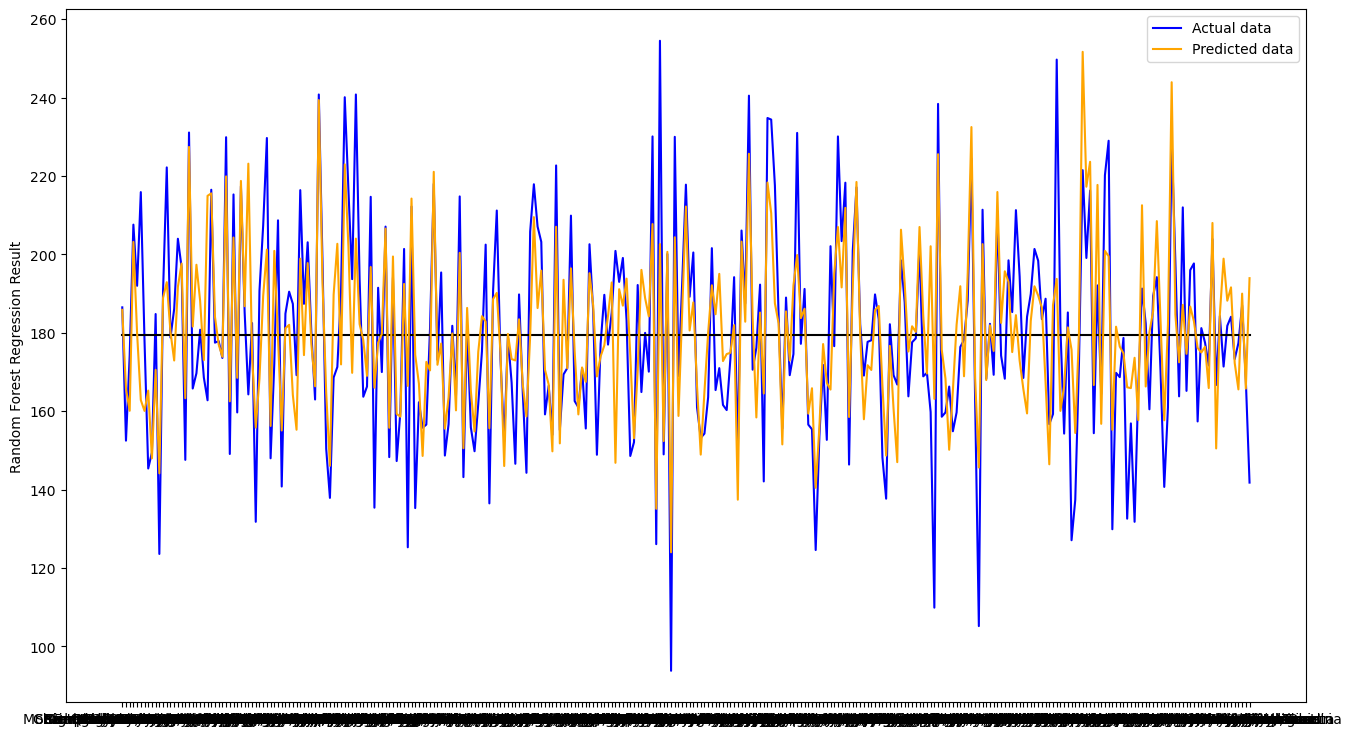

In [45]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Random Forest Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(rfr_pred, 'orange', label='Predicted data')
plt.legend()

# XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

https://xgboost.readthedocs.io/

In [46]:
# pip install xgboost

In [47]:
# xgboost model
from xgboost import XGBRegressor            

In [48]:
def XGBR_Model(trial):
  booster = trial.suggest_categorical('booster', ["gbtree", "gblinear", "dart"])
  grow_policy = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])
  gamma = trial.suggest_float("gamma", 0.1, 1.0, step=0.1)
  max_depth = trial.suggest_int("max_depth", 1, 20, step=1)
  n_estimators = trial.suggest_int("max_depth", 500, 3000, step=500)
  learning_rate = trial.suggest_float("learning_rate", 0.1, 1, step=0.1)
  xgbr = XGBRegressor(booster = booster, grow_policy = grow_policy, gamma = gamma, max_depth = max_depth, n_estimators = n_estimators, learning_rate = learning_rate)
  score = sklearn.model_selection.cross_val_score(xgbr, X_train, y_train, cv=3)
  accuracy = score.mean()
  return accuracy

In [49]:
xgbr_study = optuna.create_study(direction="maximize")
xgbr_study.optimize(XGBR_Model, n_trials=1000)
print(xgbr_study.best_trial)

[I 2023-05-10 13:53:27,847] A new study created in memory with name: no-name-a70f3c18-7794-4dd5-9db3-85478267e696
[I 2023-05-10 13:53:27,971] Trial 0 finished with value: -5104629928.664975 and parameters: {'booster': 'gblinear', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 13, 'learning_rate': 1.0}. Best is trial 0 with value: -5104629928.664975.
[I 2023-05-10 13:53:28,083] Trial 1 finished with value: 0.21940278284511686 and parameters: {'booster': 'gblinear', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 1 with value: 0.21940278284511686.


[13:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

[I 2023-05-10 13:53:28,351] Trial 2 finished with value: -2.297517548640295 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 13, 'learning_rate': 0.1}. Best is trial 1 with value: 0.21940278284511686.
[I 2023-05-10 13:53:28,443] Trial 3 finished with value: -36.15942761599052 and parameters: {'booster': 'gblinear', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 10, 'learning_rate': 0.7000000000000001}. Best is trial 1 with value: 0.21940278284511686.
[I 2023-05-10 13:53:28,532] Trial 4 finished with value: -263.371359928406 and parameters: {'booster': 'gblinear', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 10, 'learning_rate': 0.8}. Best is trial 1 with value: 0.21940278284511686.


[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\

[I 2023-05-10 13:53:28,678] Trial 5 finished with value: -7.249751765374974 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 1.0, 'max_depth': 8, 'learning_rate': 0.1}. Best is trial 1 with value: 0.21940278284511686.
[I 2023-05-10 13:53:29,734] Trial 6 finished with value: 0.4487863245903945 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 18, 'learning_rate': 0.30000000000000004}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-10 13:53:30,694] Trial 7 finished with value: 0.18738393906432058 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.7000000000000001, 'max_depth': 15, 'learning_rate': 1.0}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-10 13:53:30,763] Trial 8 finished with value: -5142.994948291059 and parameters: {'booster': 'gblinear', 'grow_policy': 'depthwise', 'gamma': 1.0, 'max_depth': 4, 'learning_rate': 0.8}. Best is trial 6 with value: 0.44878632459

[13:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:32,079] Trial 10 finished with value: 0.4470874751797475 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.4, 'max_depth': 19, 'learning_rate': 0.4}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-10 13:53:33,426] Trial 11 finished with value: 0.4313621091570686 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.4, 'max_depth': 20, 'learning_rate': 0.4}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-10 13:53:34,608] Trial 12 finished with value: 0.44409657018917653 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 17, 'learning_rate': 0.4}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-10 13:53:35,538] Trial 13 finished with value: 0.440437224069582 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.4, 'max_depth': 17, 'learning_rate': 0.30000000000000004}. Best is trial 6 with value: 0.4487863245903945.
[I 2023-05-1

[13:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:51,823] Trial 31 finished with value: 0.45394582365544695 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:52,605] Trial 32 finished with value: -0.3715012194447367 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:53,711] Trial 33 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:54,481] Trial 34 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:55,441] Trial 36 finished with value: 0.432992712628059 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 16, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:55,632] Trial 37 finished with value: -0.7659507705014833 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 8, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:55,850] Trial 38 finished with value: 0.2167699570248419 and parameters: {'booster': 'gblinear', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.


[13:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:53:56,610] Trial 39 finished with value: 0.43009438363990343 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 13, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:57,626] Trial 40 finished with value: 0.21663705693769153 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 16, 'learning_rate': 0.9}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:58,658] Trial 41 finished with value: 0.45394582365544695 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:53:59,583] Trial 42 finished with value: 0.46897098455525654 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 wi

[13:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:54:03,549] Trial 47 finished with value: -0.556194901894265 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 18, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:03,665] Trial 48 finished with value: -19.758456297656217 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 1, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:04,984] Trial 49 finished with value: 0.2847042631220999 and parameters: {'booster': 'gbtree', 'grow_policy': 'depthwise', 'gamma': 0.8, 'max_depth': 19, 'learning_rate': 0.7000000000000001}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:05,096] Trial 50 finished with value: -1.5067670073065944 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 3, 'learning_rate': 0.4}. Best is trial 25 with va

[13:54:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:54:19,602] Trial 67 finished with value: -11.23159444110398 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.5, 'max_depth': 6, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:20,505] Trial 68 finished with value: 0.4800953919796505 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:21,093] Trial 69 finished with value: 0.4481413629614502 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 17, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:22,009] Trial 70 finished with value: 0.4499673652895448 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.4, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 

[13:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:54:36,077] Trial 89 finished with value: 0.27756169599137137 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.7000000000000001}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:36,444] Trial 90 finished with value: -1.7913800091840468 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 14, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:37,345] Trial 91 finished with value: 0.48035216608012615 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:38,164] Trial 92 finished with value: 0.48035216608012615 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 

[13:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:54:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:54:56,568] Trial 115 finished with value: 0.47351661779910786 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:57,469] Trial 116 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:58,227] Trial 117 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:54:59,522] Trial 118 finished with value: 0.19566120063713513 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 18, 'learning_rate': 1.0}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05

[13:55:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:55:05,573] Trial 128 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:06,342] Trial 129 finished with value: 0.4755640343523928 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:07,526] Trial 130 finished with value: 0.44502730532852536 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:08,464] Trial 131 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value:

[13:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:55:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:55:31,284] Trial 158 finished with value: -0.22129462011360382 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:32,025] Trial 159 finished with value: 0.4689709790159096 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:33,027] Trial 160 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:55:33,896] Trial 161 finished with value: 0.4827468353409148 and parameters: {'booster': 'gbtree', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.482746843499

[13:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:57:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:57:35,556] Trial 278 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:57:36,375] Trial 279 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:57:36,550] Trial 280 finished with value: -1.4221379968389687 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 7, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:57:37,878] Trial 281 finished with value: 0.4431457529116418 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.4}. Best is trial 25 with value: 0.4827468434999864.
[

[13:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:58:01,682] Trial 299 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:01,833] Trial 300 finished with value: -6.5158394832961335 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 4, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:02,861] Trial 301 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:04,383] Trial 302 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.


[13:58:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:58:27,333] Trial 321 finished with value: 0.4679657716877655 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.7000000000000001, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:28,158] Trial 322 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:29,257] Trial 323 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:30,356] Trial 324 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 

[13:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:58:47,889] Trial 341 finished with value: -0.3715141314085104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:49,435] Trial 342 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:50,843] Trial 343 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:58:52,710] Trial 344 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.482

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:59:14,735] Trial 364 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:15,684] Trial 365 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:17,058] Trial 366 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:18,893] Trial 367 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:

[13:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[13:59:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 13:59:43,127] Trial 385 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:44,283] Trial 386 finished with value: 0.4566428052210825 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 18, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:45,292] Trial 387 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59:46,674] Trial 388 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 13:59

[14:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:00:10,010] Trial 405 finished with value: 0.44876719116181674 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:10,846] Trial 406 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:11,611] Trial 407 finished with value: 0.2257795854414613 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 12, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:12,125] Trial 408 finished with value: 0.10101024752286536 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 11, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I

[14:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:00:33,246] Trial 426 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:34,729] Trial 427 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:35,922] Trial 428 finished with value: 0.46897098455525654 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:37,147] Trial 429 finished with value: -0.22326418070109985 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[

[14:00:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:00:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:00:57,179] Trial 447 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:00:59,045] Trial 448 finished with value: 0.19861099611242664 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.9}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:00,326] Trial 449 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:01,685] Trial 450 finished with value: 0.46897098455525654 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[

[14:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:01:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:01:25,236] Trial 469 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:26,564] Trial 470 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:27,129] Trial 471 finished with value: 0.4010901590760254 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 10, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:28,510] Trial 472 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.48274

[14:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:01:52,887] Trial 490 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:54,393] Trial 491 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:55,639] Trial 492 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:01:56,907] Trial 493 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I

[14:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:02:22,204] Trial 513 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:23,697] Trial 514 finished with value: 0.4772861392327348 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.7000000000000001, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:25,164] Trial 515 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:26,113] Trial 516 finished with value: 0.45018066318688305 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 15, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.48274

[14:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:02:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:02:45,357] Trial 531 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:46,737] Trial 532 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:48,130] Trial 533 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:02:50,037] Trial 534 finished with value: 0.4703562004673909 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:0

[14:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:03:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:03:11,405] Trial 553 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:12,843] Trial 554 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:13,815] Trial 555 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:14,826] Trial 556 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[

[14:03:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:03:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:03:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:03:34,864] Trial 573 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:36,119] Trial 574 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:37,104] Trial 575 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:03:38,271] Trial 576 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14

[14:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:04:03,213] Trial 595 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:05,125] Trial 596 finished with value: 0.32173493524873603 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.6}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:06,095] Trial 597 finished with value: 0.47351662341958906 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:07,355] Trial 598 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.

[14:04:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:04:26,317] Trial 616 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:27,148] Trial 617 finished with value: -0.22129460581918847 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:28,232] Trial 618 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:30,080] Trial 619 finished with value: 0.29285556709967825 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.7000000000000001}. Best is trial 25 with value: 0.4827468434999864.


[14:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:04:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:04:49,077] Trial 637 finished with value: -9.51060597387711 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 2, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:50,514] Trial 638 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:51,685] Trial 639 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:04:52,945] Trial 640 finished with value: 0.44876719116181674 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468

[14:05:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:05:17,041] Trial 658 finished with value: 0.4818420682317002 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:18,129] Trial 659 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:19,668] Trial 660 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:21,101] Trial 661 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I

[14:05:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:05:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:05:42,204] Trial 680 finished with value: 0.39744618952262406 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.5}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:43,352] Trial 681 finished with value: 0.47351662341958906 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:44,558] Trial 682 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:05:45,530] Trial 683 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:

[14:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:06:03,356] Trial 699 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:04,963] Trial 700 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:05,918] Trial 701 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:07,232] Trial 702 finished with value: 0.4818420682317002 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06

[14:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:06:26,940] Trial 720 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:28,254] Trial 721 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:29,726] Trial 722 finished with value: 0.28613973981765606 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 20, 'learning_rate': 0.7000000000000001}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:30,317] Trial 723 finished with value: 0.3658316902079295 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 14, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827

[14:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:06:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:06:49,779] Trial 741 finished with value: 0.20469957036685724 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.9}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:50,928] Trial 742 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:52,204] Trial 743 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:06:53,763] Trial 744 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 

[14:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:07:15,680] Trial 762 finished with value: 0.48009539649855243 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.4, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:17,252] Trial 763 finished with value: 0.44876719116181674 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:18,855] Trial 764 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:20,114] Trial 765 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[

[14:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:07:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:07:42,570] Trial 783 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:44,154] Trial 784 finished with value: 0.45070778043694104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:45,399] Trial 785 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:07:46,623] Trial 786 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.48

[14:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:08:08,193] Trial 805 finished with value: 0.45084248415138495 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:09,264] Trial 806 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:10,743] Trial 807 finished with value: 0.4772861392327348 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 0.7000000000000001, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:12,196] Trial 808 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with

[14:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:08:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:08:35,498] Trial 827 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:37,035] Trial 828 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:38,339] Trial 829 finished with value: 0.48035217581859074 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:08:39,734] Trial 830 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[

[14:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:09:04,472] Trial 850 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:06,058] Trial 851 finished with value: 0.44502729906487143 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 20, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:07,456] Trial 852 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:08,884] Trial 853 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827

[14:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:09:29,787] Trial 871 finished with value: 0.32841175993481647 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 8, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:31,462] Trial 872 finished with value: 0.4800326296486143 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.9, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:32,603] Trial 873 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:09:33,882] Trial 874 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 

[14:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:10:01,652] Trial 894 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:02,563] Trial 895 finished with value: -0.3702670018857798 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:04,304] Trial 896 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:05,626] Trial 897 finished with value: 0.4818420682317002 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.1, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 

[14:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:10:30,764] Trial 915 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:32,158] Trial 916 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:33,321] Trial 917 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:34,802] Trial 918 finished with value: 0.4416411921761905 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.30000000000000004, 'max_depth': 18, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.482746

[14:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:10:58,812] Trial 937 finished with value: -0.3715141314085104 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.1}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:10:59,993] Trial 938 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:01,219] Trial 939 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:02,479] Trial 940 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'lossguide', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11

[14:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:11:22,416] Trial 959 finished with value: 0.47556403786895723 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:23,768] Trial 960 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:25,267] Trial 961 finished with value: 0.47550043833421535 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.6, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:26,544] Trial 962 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:1

[14:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.

[14:11:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "gamma", "grow_policy", "max_depth" } are not used.



[I 2023-05-10 14:11:48,421] Trial 980 finished with value: 0.44876719116181674 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 19, 'learning_rate': 0.30000000000000004}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:49,487] Trial 981 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:49,796] Trial 982 finished with value: -16.45030902913194 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 2, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2023-05-10 14:11:51,216] Trial 983 finished with value: 0.4827468434999864 and parameters: {'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}. Best is trial 25 with value: 0.4827468434999864.
[I 2

FrozenTrial(number=25, state=TrialState.COMPLETE, values=[0.4827468434999864], datetime_start=datetime.datetime(2023, 5, 10, 13, 53, 45, 444287), datetime_complete=datetime.datetime(2023, 5, 10, 13, 53, 46, 732230), params={'booster': 'dart', 'grow_policy': 'depthwise', 'gamma': 0.2, 'max_depth': 20, 'learning_rate': 0.2}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'booster': CategoricalDistribution(choices=('gbtree', 'gblinear', 'dart')), 'grow_policy': CategoricalDistribution(choices=('depthwise', 'lossguide')), 'gamma': FloatDistribution(high=1.0, log=False, low=0.1, step=0.1), 'max_depth': IntDistribution(high=20, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.1, step=0.1)}, trial_id=25, value=None)


In [50]:
plot_optimization_history(xgbr_study)

In [51]:
xgbr_study.best_trial.params

{'booster': 'dart',
 'grow_policy': 'depthwise',
 'gamma': 0.2,
 'max_depth': 20,
 'learning_rate': 0.2}

In [52]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Raw/xgbr_parameter.npy", xgbr_study.best_trial.params)

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [53]:
xgbr = XGBRegressor(**xgbr_study.best_trial.params)

In [54]:
#training the model
xgbr_model = xgbr.fit(X_train,y_train) 
xgbr_pred = xgbr_model.predict(X_val)

## Evaluate

In [55]:
#evaluating the model with the following metrics
#mean squared error
xgbr_mse=mean_squared_error(xgbr_pred, y_val)     
#mean absolute error     
xgbr_mae=mean_absolute_error(xgbr_pred, y_val)  
#root mean squared error      
xgbr_rmse=np.sqrt(mean_squared_error(xgbr_pred, y_val))
#r2 score
xgbr_r2 = r2_score(xgbr_pred, y_val)
print(f'mse: {xgbr_mse}')
print(f'mae: {xgbr_mae}')
print(f'rmse: {xgbr_rmse}')
print(f"r2_score: {xgbr_r2}")

mse: 350.1616092377037
mae: 14.337591987985078
rmse: 18.712605623955838
r2_score: 0.20464305543053596


In [56]:
xgbr_df =pd.DataFrame({"mse": xgbr_mse,"mae": xgbr_mae,"rmse": xgbr_rmse,  "r2": xgbr_r2, "deviation": deviation_function(y_val, xgbr_pred)},index=['XGBoost Regression'])

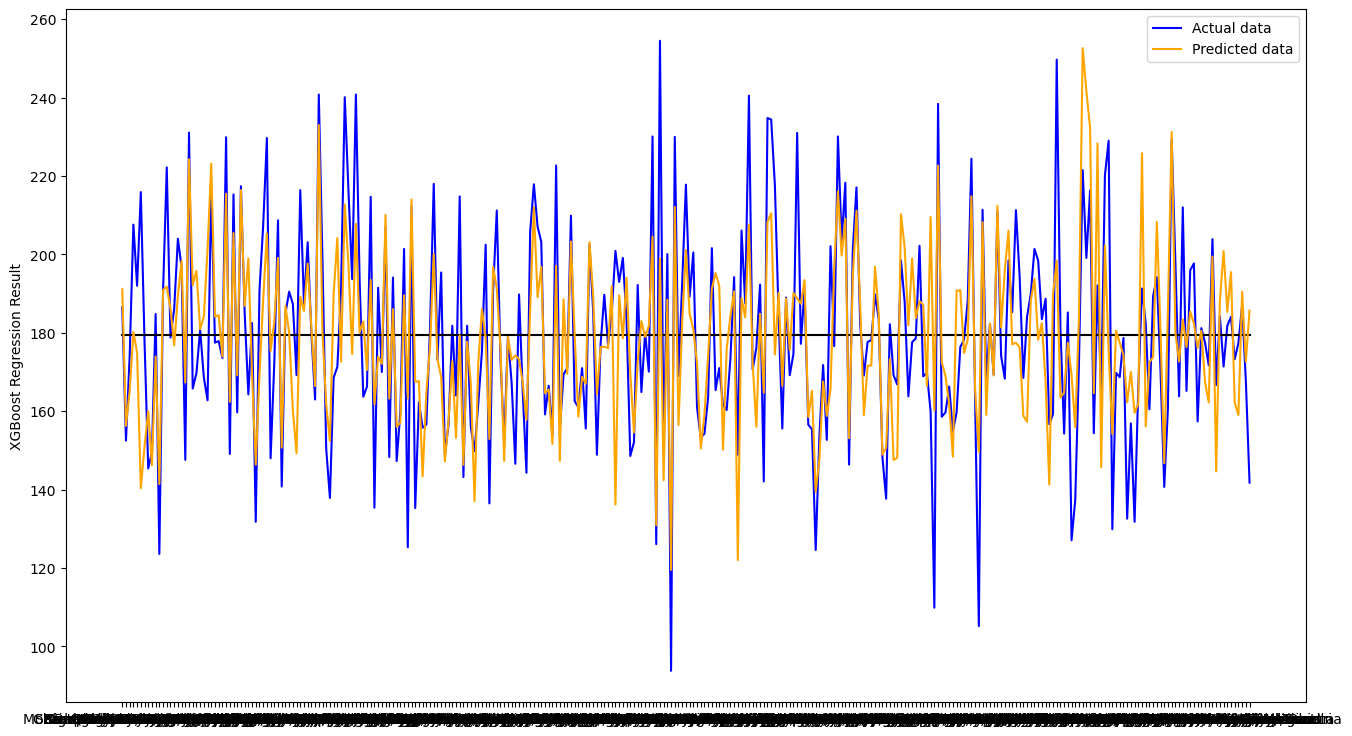

In [57]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('XGBoost Regression Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(xgbr_pred, 'orange', label='Predicted data')
plt.legend()

# Neural Network

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/

https://xgboost.readthedocs.io/

In [58]:
# pip install xgboost

In [59]:
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.preprocessing import RobustScaler, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [60]:
def NN_Model(trial):
    # We optimize the numbers of layers, their units and weight decay parameter.
    n_layers = trial.suggest_int("n_layers", 1, 6, step = 1)
    weight_decay = trial.suggest_float("weight_decay", 1e-10, 1e-3, log=True)
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 1e-1, log=True)
    model = Sequential()
    model.add(Flatten())
    for i in range(n_layers):
        num_hidden = trial.suggest_int("n_units_l{}".format(i), 4, 4096, log=True)
        dropout = trial.suggest_uniform("Dropout_rate", 0.01, 0.80)
        activation = trial.suggest_categorical('activation', ["relu", "tanh", "linear"])
        model.add(
            Dense(
                num_hidden,
                activation=activation,
                kernel_regularizer=tf.keras.regularizers.l2(weight_decay),
            )
        )
        model.add(Dropout(dropout))
    model.add(
        Dense(1, kernel_regularizer=tf.keras.regularizers.l2(weight_decay))
    )
    model.compile(
      loss='mse',
      optimizer=Adam(learning_rate = learning_rate)
    )
    return model

In [61]:
EPOCHS = 30 # number of epocs per trial

def objective(trial):
    keras.backend.clear_session()
    # Generate our trial model.
    model = NN_Model(trial)

    # learning rate scheduler
    scheduler = ExponentialDecay(1e-3, 400*((len(X_train)*0.8)/16), 1e-5)
    lr = LearningRateScheduler(scheduler, verbose=0)

    # Fit the model on the training data.
    # The TFKerasPruningCallback checks for pruning condition every epoch.
    model.fit(
        X_train, y_train,
        batch_size=16,
        callbacks=[TFKerasPruningCallback(trial, "val_loss")],
        epochs=EPOCHS,
        validation_data=(X_val, y_val),
        verbose=1,
    )

    # Evaluate the model accuracy on the validation set.
    score = model.evaluate(X_val, y_val, verbose=0)
    return score

In [62]:
nn_study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
nn_study.optimize(objective, n_trials=10)
pruned_trials = nn_study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = nn_study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

[I 2023-05-10 14:12:24,780] A new study created in memory with name: no-name-f87a6ad3-c991-4373-950b-285aede07737


Epoch 1/30
155/155 [==============================] - 3s 6ms/step - loss: 21867866.0000 - val_loss: 32268.5977
Epoch 2/30
155/155 [==============================] - 1s 4ms/step - loss: 323196.3438 - val_loss: 32784.1758
Epoch 3/30
155/155 [==============================] - 1s 4ms/step - loss: 66485.2656 - val_loss: 32738.8262
Epoch 4/30
155/155 [==============================] - 1s 4ms/step - loss: 43536.4805 - val_loss: 32670.5840
Epoch 5/30
155/155 [==============================] - 0s 3ms/step - loss: 38169.5977 - val_loss: 32438.5020
Epoch 6/30
155/155 [==============================] - 1s 4ms/step - loss: 71583.8516 - val_loss: 32378.1875
Epoch 7/30
155/155 [==============================] - 0s 3ms/step - loss: 52302.3398 - val_loss: 32369.9512
Epoch 8/30
155/155 [==============================] - 1s 4ms/step - loss: 32129.6855 - val_loss: 32226.4980
Epoch 9/30
155/155 [==============================] - 0s 3ms/step - loss: 32130.7148 - val_loss: 32095.7578
Epoch 10/30
155/155 [===

[I 2023-05-10 14:12:43,530] Trial 0 finished with value: 28214.361328125 and parameters: {'n_layers': 2, 'weight_decay': 1.5812640055369042e-07, 'learning_rate': 0.00446725164999789, 'n_units_l0': 8, 'Dropout_rate': 0.6937905481461016, 'activation': 'relu', 'n_units_l1': 4}. Best is trial 0 with value: 28214.361328125.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 336703072.0000 - val_loss: 19449932.0000
Epoch 2/30
155/155 [==============================] - 0s 3ms/step - loss: 241537808.0000 - val_loss: 6225997.0000
Epoch 3/30
155/155 [==============================] - 0s 3ms/step - loss: 184731168.0000 - val_loss: 2495061.2500
Epoch 4/30
155/155 [==============================] - 1s 4ms/step - loss: 155260400.0000 - val_loss: 832667.2500
Epoch 5/30
155/155 [==============================] - 0s 3ms/step - loss: 117563600.0000 - val_loss: 377140.7500
Epoch 6/30
155/155 [==============================] - 0s 3ms/step - loss: 92493328.0000 - val_loss: 124406.0625
Epoch 7/30
155/155 [==============================] - 1s 3ms/step - loss: 87132176.0000 - val_loss: 65185.9219
Epoch 8/30
155/155 [==============================] - 1s 3ms/step - loss: 74360312.0000 - val_loss: 36983.9336
Epoch 9/30
155/155 [==============================] - 1s 3ms/step - loss: 63857680.0000 - val_los

[I 2023-05-10 14:13:00,941] Trial 1 finished with value: 25402.548828125 and parameters: {'n_layers': 2, 'weight_decay': 2.8256485638154663e-06, 'learning_rate': 0.00013766577267548648, 'n_units_l0': 4, 'Dropout_rate': 0.6297878375538406, 'activation': 'linear', 'n_units_l1': 28}. Best is trial 1 with value: 25402.548828125.


Epoch 1/30
155/155 [==============================] - 8s 38ms/step - loss: 27128706.0000 - val_loss: 708362.6250
Epoch 2/30
155/155 [==============================] - 6s 36ms/step - loss: 17750502.0000 - val_loss: 61598.3984
Epoch 3/30
155/155 [==============================] - 6s 36ms/step - loss: 12650582.0000 - val_loss: 128994.7266
Epoch 4/30
155/155 [==============================] - 6s 36ms/step - loss: 9062122.0000 - val_loss: 129965.6016
Epoch 5/30
155/155 [==============================] - 6s 36ms/step - loss: 7073046.5000 - val_loss: 14734.4160
Epoch 6/30
155/155 [==============================] - 6s 36ms/step - loss: 5699188.0000 - val_loss: 6754.4351
Epoch 7/30
155/155 [==============================] - 5s 35ms/step - loss: 4727679.5000 - val_loss: 4823.1133
Epoch 8/30
155/155 [==============================] - 6s 36ms/step - loss: 4006315.5000 - val_loss: 13261.8242
Epoch 9/30
155/155 [==============================] - 6s 36ms/step - loss: 3529244.5000 - val_loss: 22636.44

[I 2023-05-10 14:15:48,986] Trial 2 finished with value: 31594.720703125 and parameters: {'n_layers': 4, 'weight_decay': 2.5820176364931574e-08, 'learning_rate': 4.5845497770973134e-05, 'n_units_l0': 569, 'Dropout_rate': 0.5618177776422973, 'activation': 'relu', 'n_units_l1': 539, 'n_units_l2': 1633, 'n_units_l3': 1580}. Best is trial 1 with value: 25402.548828125.


Epoch 1/30
155/155 [==============================] - 2s 6ms/step - loss: 15695464.0000 - val_loss: 726118.0625
Epoch 2/30
155/155 [==============================] - 1s 5ms/step - loss: 13253823.0000 - val_loss: 253839.4531
Epoch 3/30
155/155 [==============================] - 1s 5ms/step - loss: 11564862.0000 - val_loss: 341677.8750
Epoch 4/30
155/155 [==============================] - 1s 5ms/step - loss: 10394466.0000 - val_loss: 699057.7500
Epoch 5/30
155/155 [==============================] - 1s 4ms/step - loss: 9193401.0000 - val_loss: 147605.9375
Epoch 6/30
155/155 [==============================] - 1s 4ms/step - loss: 8609254.0000 - val_loss: 241900.4844
Epoch 7/30
155/155 [==============================] - 1s 5ms/step - loss: 8742618.0000 - val_loss: 11029.2773
Epoch 8/30
155/155 [==============================] - 1s 5ms/step - loss: 8069259.5000 - val_loss: 18599.0684
Epoch 9/30
155/155 [==============================] - 1s 5ms/step - loss: 7677643.0000 - val_loss: 860930.8125

[I 2023-05-10 14:16:14,629] Trial 3 finished with value: 39919.12890625 and parameters: {'n_layers': 2, 'weight_decay': 9.43622488549481e-07, 'learning_rate': 2.1398604157448544e-05, 'n_units_l0': 76, 'Dropout_rate': 0.21783562835153022, 'activation': 'linear', 'n_units_l1': 1052}. Best is trial 1 with value: 25402.548828125.


Epoch 1/30
155/155 [==============================] - 5s 14ms/step - loss: 293152736.0000 - val_loss: 1522355.1250
Epoch 2/30
155/155 [==============================] - 2s 12ms/step - loss: 235537264.0000 - val_loss: 708329.3125
Epoch 3/30
155/155 [==============================] - 2s 11ms/step - loss: 227769504.0000 - val_loss: 52262.0820
Epoch 4/30
155/155 [==============================] - 2s 12ms/step - loss: 166861696.0000 - val_loss: 44511.8672
Epoch 5/30
155/155 [==============================] - 2s 12ms/step - loss: 176250672.0000 - val_loss: 14626.0176
Epoch 6/30
155/155 [==============================] - 2s 12ms/step - loss: 166082576.0000 - val_loss: 771580.0625
Epoch 7/30
155/155 [==============================] - 2s 12ms/step - loss: 159651600.0000 - val_loss: 55905.6719
Epoch 8/30
155/155 [==============================] - 2s 12ms/step - loss: 137220384.0000 - val_loss: 155666.2188
Epoch 9/30
155/155 [==============================] - 2s 12ms/step - loss: 129393472.0000 -

[I 2023-05-10 14:16:36,121] Trial 4 pruned. Trial was pruned at epoch 9.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 32611.1523 - val_loss: 32612.7402
Epoch 2/30
155/155 [==============================] - 0s 3ms/step - loss: 32137.4590 - val_loss: 32166.0391
Epoch 3/30
155/155 [==============================] - 0s 3ms/step - loss: 31693.6523 - val_loss: 31750.1875
Epoch 4/30
155/155 [==============================] - 0s 3ms/step - loss: 31247.8906 - val_loss: 31295.2852
Epoch 5/30
155/155 [==============================] - 0s 3ms/step - loss: 30794.9512 - val_loss: 30822.9961
Epoch 6/30
155/155 [==============================] - 0s 3ms/step - loss: 30363.3594 - val_loss: 30389.2598
Epoch 7/30
155/155 [==============================] - 0s 3ms/step - loss: 29926.3496 - val_loss: 29965.9141
Epoch 8/30
155/155 [==============================] - 0s 3ms/step - loss: 29512.8145 - val_loss: 29545.0059
Epoch 9/30
155/155 [==============================] - 0s 3ms/step - loss: 29092.5332 - val_loss: 29128.8652
Epoch 10/30
155/155 [=======

[I 2023-05-10 14:16:51,513] Trial 5 finished with value: 21152.064453125 and parameters: {'n_layers': 1, 'weight_decay': 2.6726593820884156e-10, 'learning_rate': 0.0004210647472742517, 'n_units_l0': 23, 'Dropout_rate': 0.19434424853462598, 'activation': 'tanh'}. Best is trial 5 with value: 21152.064453125.


Epoch 1/30
155/155 [==============================] - 7s 37ms/step - loss: 2035.2771 - val_loss: 739.7298
Epoch 2/30
155/155 [==============================] - 5s 34ms/step - loss: 793.6581 - val_loss: 731.9354
Epoch 3/30
155/155 [==============================] - 5s 33ms/step - loss: 799.9680 - val_loss: 759.7448
Epoch 4/30
155/155 [==============================] - 5s 33ms/step - loss: 792.6083 - val_loss: 754.8349
Epoch 5/30
155/155 [==============================] - 5s 34ms/step - loss: 796.1360 - val_loss: 731.3209
Epoch 6/30
155/155 [==============================] - 5s 34ms/step - loss: 802.6579 - val_loss: 731.6456
Epoch 7/30
155/155 [==============================] - 5s 34ms/step - loss: 797.0023 - val_loss: 778.3691
Epoch 8/30
155/155 [==============================] - 5s 34ms/step - loss: 808.8269 - val_loss: 737.4309
Epoch 9/30
155/155 [==============================] - 5s 34ms/step - loss: 801.0709 - val_loss: 731.3497
Epoch 10/30
155/155 [==============================] -

[I 2023-05-10 14:19:21,242] Trial 6 finished with value: 745.1322021484375 and parameters: {'n_layers': 2, 'weight_decay': 1.4550843792736004e-09, 'learning_rate': 0.005701862795487532, 'n_units_l0': 2880, 'Dropout_rate': 0.07373383456613108, 'activation': 'tanh', 'n_units_l1': 1208}. Best is trial 6 with value: 745.1322021484375.


Epoch 1/30
155/155 [==============================] - 2s 4ms/step - loss: 138670.5000 - val_loss: 30611.2910
Epoch 2/30
155/155 [==============================] - 0s 3ms/step - loss: 30543.2891 - val_loss: 23747.9863
Epoch 3/30
155/155 [==============================] - 0s 3ms/step - loss: 18830.4727 - val_loss: 11930.6328
Epoch 4/30
155/155 [==============================] - 0s 3ms/step - loss: 8698.7949 - val_loss: 3204.5173
Epoch 5/30
155/155 [==============================] - 1s 3ms/step - loss: 4214.0327 - val_loss: 1219.8910
Epoch 6/30
155/155 [==============================] - 0s 3ms/step - loss: 3983.9910 - val_loss: 1067.7197
Epoch 7/30
155/155 [==============================] - 0s 3ms/step - loss: 3835.9043 - val_loss: 1057.9270
Epoch 8/30
155/155 [==============================] - 0s 3ms/step - loss: 199012.4844 - val_loss: 2109.6475
Epoch 9/30
155/155 [==============================] - 0s 3ms/step - loss: 3558.0959 - val_loss: 972.0765
Epoch 10/30
155/155 [=================

[I 2023-05-10 14:19:36,474] Trial 7 finished with value: 845.1360473632812 and parameters: {'n_layers': 5, 'weight_decay': 1.3650900637881848e-06, 'learning_rate': 0.0016974341894071881, 'n_units_l0': 10, 'Dropout_rate': 0.5988389871602284, 'activation': 'relu', 'n_units_l1': 386, 'n_units_l2': 6, 'n_units_l3': 189, 'n_units_l4': 375}. Best is trial 6 with value: 745.1322021484375.


Epoch 1/30
155/155 [==============================] - 2s 10ms/step - loss: 39568364.0000 - val_loss: 97244.0625
Epoch 2/30
155/155 [==============================] - ETA: 0s - loss: 27617642.0000

[I 2023-05-10 14:19:40,396] Trial 8 pruned. Trial was pruned at epoch 1.


Epoch 1/30
155/155 [==============================] - 2s 5ms/step - loss: 19644.9492 - val_loss: 10121.8691
Epoch 2/30
155/155 [==============================] - 0s 2ms/step - loss: 5906.9795 - val_loss: 2796.7209
Epoch 3/30
155/155 [==============================] - 0s 2ms/step - loss: 2227.2224 - val_loss: 1089.1035
Epoch 4/30
155/155 [==============================] - 0s 3ms/step - loss: 1527.6313 - val_loss: 805.8359
Epoch 5/30
155/155 [==============================] - 0s 2ms/step - loss: 1425.8398 - val_loss: 769.7764
Epoch 6/30
155/155 [==============================] - 0s 2ms/step - loss: 1381.7490 - val_loss: 753.1907
Epoch 7/30
155/155 [==============================] - 0s 2ms/step - loss: 1447.7612 - val_loss: 750.6260
Epoch 8/30
155/155 [==============================] - 0s 2ms/step - loss: 1412.3398 - val_loss: 753.4208
Epoch 9/30
155/155 [==============================] - 0s 2ms/step - loss: 1477.8374 - val_loss: 749.2878
Epoch 10/30
155/155 [=============================

[I 2023-05-10 14:19:51,594] Trial 9 finished with value: 747.3854370117188 and parameters: {'n_layers': 3, 'weight_decay': 1.0425048389543626e-08, 'learning_rate': 0.0332021436149024, 'n_units_l0': 333, 'Dropout_rate': 0.27885071518040355, 'activation': 'tanh', 'n_units_l1': 4, 'n_units_l2': 16}. Best is trial 6 with value: 745.1322021484375.


In [63]:
plot_optimization_history(nn_study)

In [64]:
nn_study.best_trial.params

{'n_layers': 2,
 'weight_decay': 1.4550843792736004e-09,
 'learning_rate': 0.005701862795487532,
 'n_units_l0': 2880,
 'Dropout_rate': 0.07373383456613108,
 'activation': 'tanh',
 'n_units_l1': 1208}

In [65]:
np.save(f"G:/My Drive/DataMining/POC/LungCancer/local/Parameter/Raw/nn_parameter.npy", nn_study.best_trial.params)

https://stackoverflow.com/questions/19201290/how-to-save-a-dictionary-to-a-file

In [66]:
nn_mod = Sequential()
nn_mod.add(Flatten())
#layer 1
nn_mod.add(
            Dense(
                units = nn_study.best_trial.params['n_units_l0'],
                activation=nn_study.best_trial.params["activation"],
                kernel_regularizer=tf.keras.regularizers.l2(nn_study.best_trial.params["weight_decay"]),
            )
        )
nn_mod.add(Dropout(nn_study.best_trial.params['Dropout_rate']))
#layer 2
nn_mod.add(
            Dense(
                units = nn_study.best_trial.params['n_units_l1'],
                activation=nn_study.best_trial.params["activation"],
                kernel_regularizer=tf.keras.regularizers.l2(nn_study.best_trial.params["weight_decay"]),
            )
        )
nn_mod.add(Dropout(nn_study.best_trial.params['Dropout_rate']))
#output
nn_mod.add(
        Dense(1, kernel_regularizer=tf.keras.regularizers.l2(nn_study.best_trial.params["weight_decay"]))
    )
nn_mod.compile(
      loss='mse',
      optimizer=Adam(learning_rate = nn_study.best_trial.params['learning_rate'])
    )


In [67]:
history = nn_mod.fit(
        X_train, y_train,
        batch_size=16,
        epochs=EPOCHS,
        validation_data=(X_val, y_val),
        verbose=1,
    )

Epoch 1/30
155/155 [==============================] - 7s 40ms/step - loss: 2061.9050 - val_loss: 731.1152
Epoch 2/30
155/155 [==============================] - 5s 35ms/step - loss: 790.4537 - val_loss: 731.9230
Epoch 3/30
155/155 [==============================] - 5s 31ms/step - loss: 795.9415 - val_loss: 744.7604
Epoch 4/30
155/155 [==============================] - 5s 30ms/step - loss: 797.6788 - val_loss: 732.7419
Epoch 5/30
155/155 [==============================] - 5s 30ms/step - loss: 793.6442 - val_loss: 748.9592
Epoch 6/30
155/155 [==============================] - 5s 30ms/step - loss: 806.2715 - val_loss: 734.7016
Epoch 7/30
155/155 [==============================] - 7s 48ms/step - loss: 794.7783 - val_loss: 730.9789
Epoch 8/30
155/155 [==============================] - 6s 41ms/step - loss: 797.9547 - val_loss: 757.5984
Epoch 9/30
155/155 [==============================] - 5s 29ms/step - loss: 802.8960 - val_loss: 744.9475
Epoch 10/30
155/155 [==============================] -

In [68]:
nn_mod.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_4 (Dense)             (None, 2880)              106560    
                                                                 
 dropout_3 (Dropout)         (None, 2880)              0         
                                                                 
 dense_5 (Dense)             (None, 1208)              3480248   
                                                                 
 dropout_4 (Dropout)         (None, 1208)              0         
                                                                 
 dense_6 (Dense)             (None, 1)                 1209      
                                                                 
Total params: 3,588,017
Trainable params: 3,588,017
No

In [69]:
nn_pred = nn_mod.predict(X_val)

10/10 [==============================] - 0s 4ms/step


## Evaluate

In [70]:
#evaluating the model with the following metrics
#mean squared error
nn_mse=mean_squared_error(nn_pred, y_val)     
#mean absolute error     
nn_mae=mean_absolute_error(nn_pred, y_val)  
#root mean squared error      
nn_rmse=np.sqrt(mean_squared_error(nn_pred, y_val))
#r2 score
nn_r2 = r2_score(nn_pred, y_val)
print(f'mse: {nn_mse}')
print(f'mae: {nn_mae}')
print(f'rmse: {nn_rmse}')
print(f"r2_score: {nn_r2}")

mse: 737.8603053724419
mae: 21.449419625704405
rmse: 27.1635841775794
r2_score: -3169085880590.211


In [71]:
nn_df =pd.DataFrame({"mse": nn_mse,"mae": nn_mae,"rmse": nn_rmse,  "r2": nn_r2, "deviation": deviation_function(y_val, nn_pred)},index=['Neural Network'])

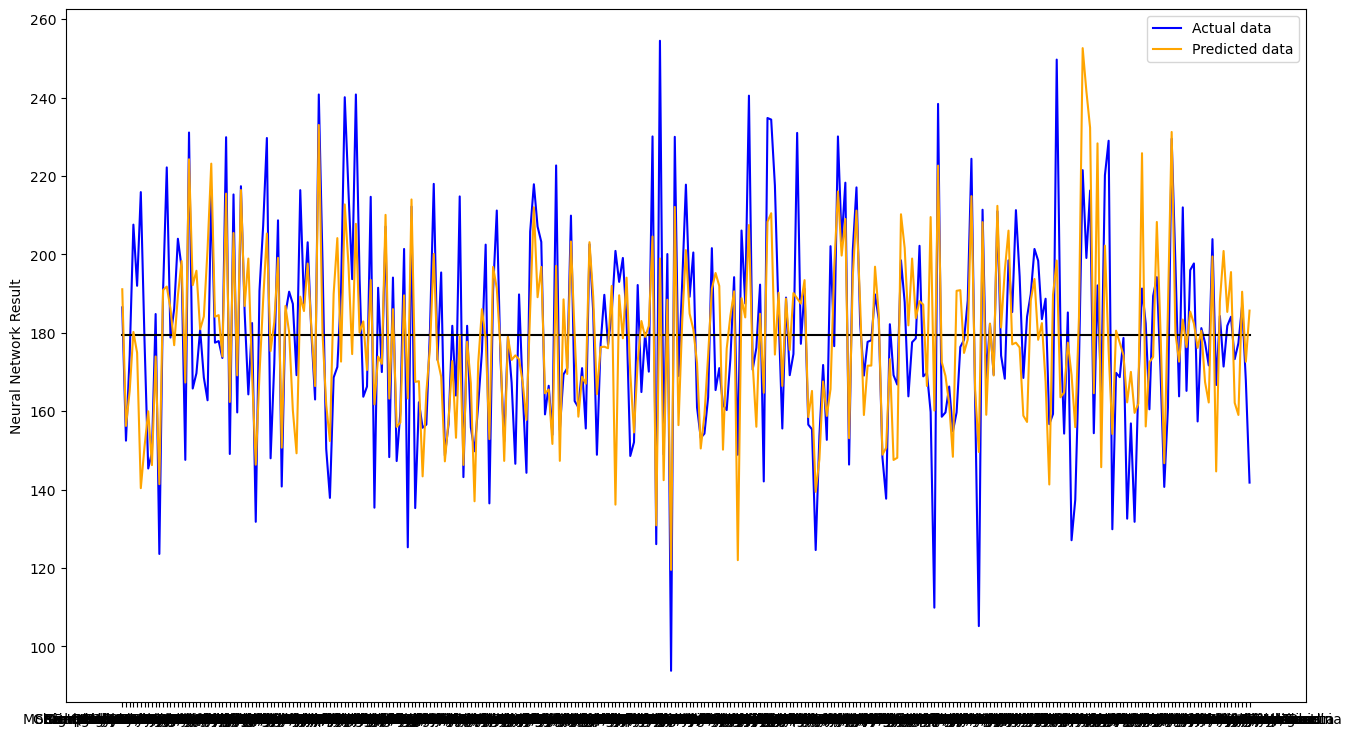

In [72]:
Axis = [y_val.mean()] * len(y_val)
plt.figure(figsize=(16, 9))
plt.ylabel('Neural Network Result')
plt.plot(y_val, 'blue', label='Actual data')
plt.plot(Axis, color="black")
plt.plot(xgbr_pred, 'orange', label='Predicted data')
plt.legend()

# Comparision

https://stats.stackexchange.com/questions/183265/what-does-negative-r-squared-mean#:~:text=It%20means%20you've%20done,least%20squares%20regression%20line%20itself.

https://www.kaggle.com/questions-and-answers/267943

In [73]:
df_evaluation = pd.concat([lr_df, nn_df, dtr_df, rfr_df, xgbr_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
Linear Regression,321.958409,13.794004,17.943200,3.680029e-01,0.079899
Neural Network,737.860305,21.449420,27.163584,-3.169086e+12,0.122417
Decision Tree Regression,747.986131,20.882951,27.349335,3.732183e-02,0.118139
Random Forest Regression,306.613763,13.278531,17.510390,2.438840e-01,0.077327
XGBoost Regression,350.161609,14.337592,18.712606,2.046431e-01,0.081803


In [74]:
df_evaluation.to_csv("G:/My Drive/DataMining/POC/LungCancer/local/Evaluation/Raw/optuna.csv")

# Save Model

In [75]:
import pickle
lr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/lr_Optuna.h5'
pickle.dump(lr_model, open(lr_filename, 'wb'))
# svr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/svr_Optuna.h5'
# pickle.dump(svr_model, open(svr_filename, 'wb'))
rfr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/rfr_Optuna.h5'
pickle.dump(rfr_model, open(rfr_filename, 'wb'))
dtr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/dtr_Optuna.h5'
pickle.dump(dtr_model, open(dtr_filename, 'wb'))
xgbr_filename = 'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/xgbr_Optuna.h5'
pickle.dump(xgbr_model, open(xgbr_filename, 'wb'))
nn_mod.save(f'G:/My Drive/DataMining/POC/LungCancer/local/Model/Raw/nn_Optuna.h5')